0
500
1000
1500
2000
2500
3000
3500
4000
4500


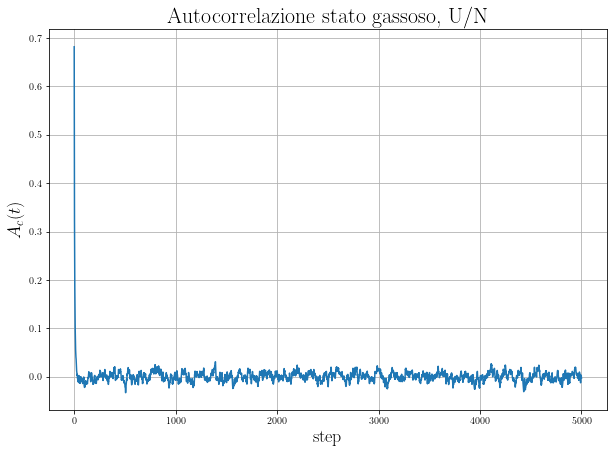

In [14]:
##autocorrelazione 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

def chi(t, tmax, z):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    sum5 = 0
    delta = tmax - t
    for i in range(int(delta)):
        sum1 += z[i]*z[i+int(t)]
        sum2 += z[i]
        sum3 += z[i+int(t)]
    for i in range(int(tmax)):
        sum4 += z[i]*z[i]
        sum5 += z[i]
    return (sum1/delta - (sum2/delta)*(sum3/delta))/((sum4/tmax) - (sum5/tmax)**2)

tvector, z = np.loadtxt("output.epot.cor.dat", usecols=(0, 1), delimiter=', ', unpack='true')
tmax = tvector[tvector.size-1] 
y=np.zeros(5000)
x=np.zeros(5000)

for i in range(5000): ##for i in range(int(tmax)):
    y[i] = chi(tvector[i], tmax, z)
    x[i] = i+1
    if(i%500 == 0):
        print(i)
plt.figure(figsize=(10, 7))

plt.title('Autocorrelazione stato gassoso, U/N', fontsize=22)
plt.plot(x, y)
plt.xlabel('step', fontsize=18)
plt.ylabel('$A_c(t)$', fontsize=18)
plt.grid(True)






249
0


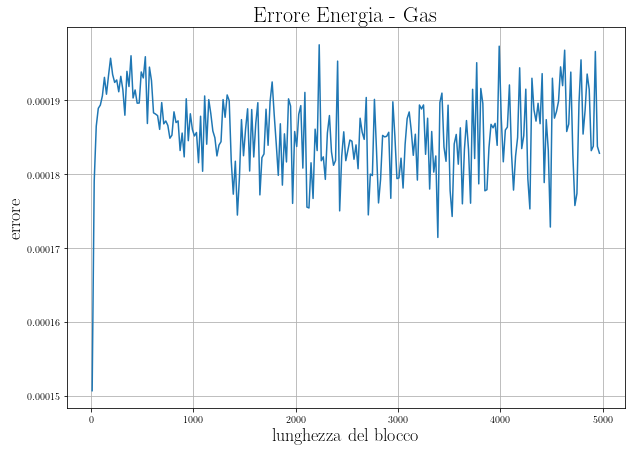

In [17]:
## errore

import matplotlib
import matplotlib.pyplot as plt
import numpy as np




def errore(ave, ave2, n):
    if (n == 0):
        return 0;
    return ((ave2 - ave*ave)/n)**(1/2)


def err_blk(z, L, M):
    sum1 = 0
    ave1 = 0
    ave2 = 0
    N = int(M/L)
    k = 0
    for i in range(N):
        sum1 = 0
        for j in range(L):
            sum1 = sum1 + z[k]
            k = k +1
        ave1 = ave1 + sum1/L
        ave2 = ave2 + (sum1/L)**2
        
    err = errore(ave1/N, ave2/N, N)
    return err

tvector, z = np.loadtxt("output.epot.dat", usecols=(0, 1), delimiter=', ', unpack='true')
M = tvector[tvector.size-1]       
deltaL = 20
L = 10
Lmax = 5000
dim = int((Lmax - L)/deltaL)
y=np.zeros(dim)
x=np.zeros(dim)

print(dim)

for i in range(dim):
    y[i] = err_blk(z, L, M)
    x[i] = L
    L = L+deltaL
    if(i%500 == 0):
        print(i)

plt.figure(figsize=(10, 7))

plt.title('Errore Energia - Gas', fontsize=22)

plt.xlabel('lunghezza del blocco', fontsize=18)
plt.ylabel('errore', fontsize=18)
        
plt.plot(x, y)
plt.grid(True)



249
0


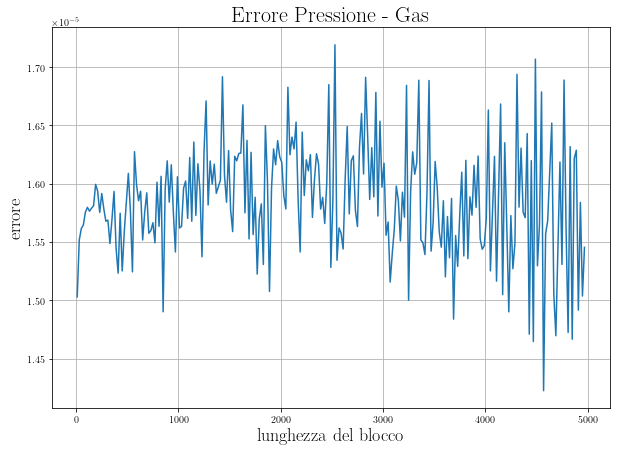

In [18]:
##errore

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def errore(ave, ave2, n):
    if (n == 0):
        return 0;
    return ((ave2 - ave*ave)/n)**(1/2)


def err_blk(z, L, M):
    sum1 = 0
    ave1 = 0
    ave2 = 0
    N = int(M/L)
    k = 0
    for i in range(N):
        sum1 = 0
        for j in range(L):
            sum1 = sum1 + z[k]
            k = k +1
        ave1 = ave1 + sum1/L
        ave2 = ave2 + (sum1/L)**2
        
    err = errore(ave1/N, ave2/N, N)
    return err

tvector, z = np.loadtxt("output.pres.dat", usecols=(0, 1), delimiter=', ', unpack='true')
M = tvector[tvector.size-1]       
deltaL = 20
L = 10
Lmax = 5000
dim = int((Lmax - L)/deltaL)
y=np.zeros(dim)
x=np.zeros(dim)

print(dim)

for i in range(dim):
    y[i] = err_blk(z, L, M)
    x[i] = L
    L = L+deltaL
    if(i%500 == 0):
        print(i)

plt.figure(figsize=(10, 7))

plt.title('Errore Pressione - Gas', fontsize=22)

plt.xlabel('lunghezza del blocco', fontsize=18)
plt.ylabel('errore', fontsize=18)
        
plt.plot(x, y)
plt.grid(True)


    

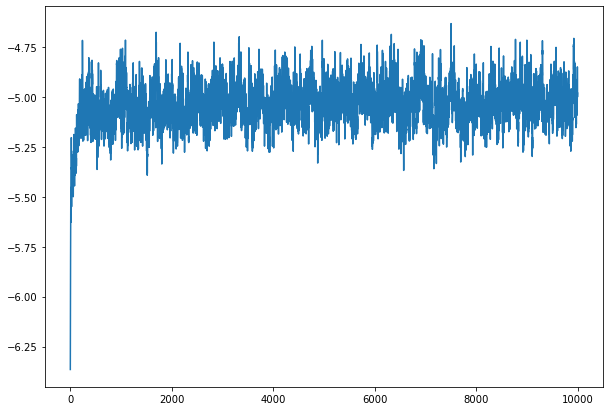

<Figure size 1440x720 with 0 Axes>

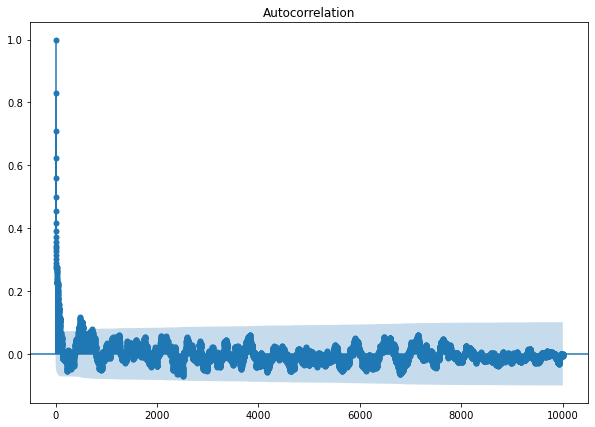

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

N=10001
x2 = np.arange(N)
z = np.loadtxt("output.epot.dat", unpack='true', usecols=(1), delimiter=',')

plt.figure(figsize=(10,7))
plt.plot(x2, z)

plt.rc("figure", figsize=(10,7))
plt.figure(figsize=(20,10))
plot_acf(z, lags=10000)
plt.show();

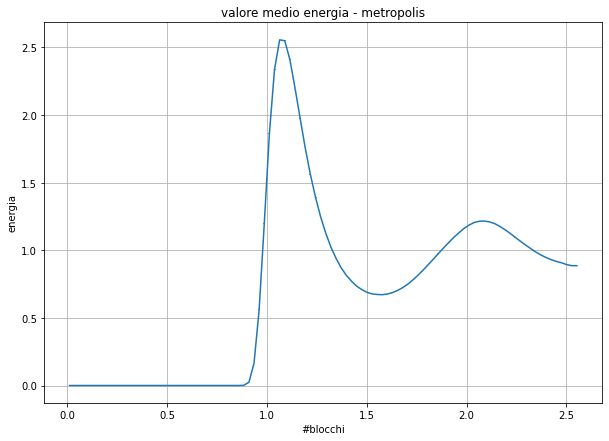

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x, f, error = np.loadtxt("output.gave.0", usecols=(0,1,2), unpack='true',  delimiter=',')


plt.errorbar(x,f,yerr=error)
plt.xlabel('#blocchi')
plt.ylabel('energia')
plt.title("valore medio energia - metropolis")
plt.grid(True)
plt.show()

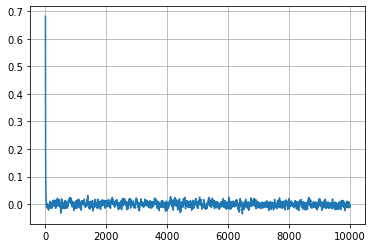


0
500
1000
1500
2000
2500
3000
3500
4000
4500


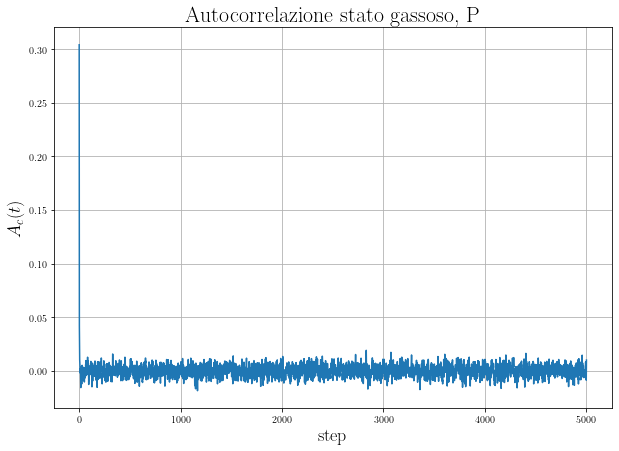

In [15]:
def chi(t, tmax, z):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    sum5 = 0
    delta = tmax - t
    for i in range(int(delta)):
        sum1 += z[i]*z[i+int(t)]
        sum2 += z[i]
        sum3 += z[i+int(t)]
    for i in range(int(tmax)):
        sum4 += z[i]*z[i]
        sum5 += z[i]
    return (sum1/delta - (sum2/delta)*(sum3/delta))/((sum4/tmax) - (sum5/tmax)**2)

tvector, z = np.loadtxt("output.pres.cor.dat", usecols=(0, 1), delimiter=', ', unpack='true')
tmax = tvector[tvector.size-1] 
y=np.zeros(5000)
x=np.zeros(5000)

for i in range(5000): ##for i in range(int(tmax)):
    y[i] = chi(tvector[i], tmax, z)
    x[i] = i+1
    if(i%500 == 0):
        print(i)
plt.figure(figsize=(10, 7))

plt.title('Autocorrelazione stato gassoso, P', fontsize=22)
plt.plot(x, y)
plt.xlabel('step', fontsize=18)
plt.ylabel('$A_c(t)$', fontsize=18)
plt.grid(True)